# Part 1: Download data and set directories

In [0]:
# Usaremos una base de datos de imágenes con dos clases: perros y gatos.

# El objetivo es diseñar redes neuronales de convolución para clasificar perros de gatos.
# Este problema es mucho más complejo que los anteriores, ya que: 1) las características
# visuales que comparten perros y gatos pueden ser altas; y 2) las imágenes pueden contener
# background común. Estas dos características hace difícil separa las imágenes.

In [0]:
from keras import initializers
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from keras.models import Sequential # The sequential API allows you to create models layer-by-layer for most problems.
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, UpSampling2D
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# Download data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
# Define paths to training and validation images
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'validation')

# Specify them by class
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with training dog pictures
val_cats_dir = os.path.join(val_dir, 'cats')      # directory with validation cat pictures
val_dogs_dir = os.path.join(val_dir, 'dogs')      # directory with validation dog pictures

In [0]:
# Count how many of them are there
n_cats_train = len(os.listdir(train_cats_dir))
n_dogs_train = len(os.listdir(train_dogs_dir))

n_cats_val = len(os.listdir(val_cats_dir))
n_dogs_val = len(os.listdir(val_dogs_dir))

n_total_train = n_cats_train + n_dogs_train
n_total_val = n_cats_val + n_dogs_val

# Print some info
print('total training cat images:', n_cats_train)
print('total training dog images:', n_dogs_train)

print('total validation cat images:', n_cats_val)
print('total validation dog images:', n_dogs_val)
print("--")
print("Total training images:", n_total_train)
print("Total validation images:", n_total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
# No data has been loaded yet
whos

Variable             Type               Data/Info
-------------------------------------------------
Conv2D               type               <class 'keras.layers.convolutional.Conv2D'>
Dense                type               <class 'keras.layers.core.Dense'>
Dropout              type               <class 'keras.layers.core.Dropout'>
Flatten              type               <class 'keras.layers.core.Flatten'>
ImageDataGenerator   type               <class 'keras.preprocessi<...>mage.ImageDataGenerator'>
MaxPooling2D         type               <class 'keras.layers.pooling.MaxPooling2D'>
PATH                 str                /root/.keras/datasets/cats_and_dogs_filtered
Sequential           type               <class 'keras.engine.sequential.Sequential'>
UpSampling2D         type               <class 'keras.layers.convolutional.UpSampling2D'>
initializers         module             <module 'keras.initialize<...>s/keras/initializers.py'>
keras                TFModuleWrapper    <module 'tenso

# Part 2: Define batch-generator process

In [0]:
# Define some constants
batch_size = 128
n_epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
# Define generator objects for training and validation data
train_generator = ImageDataGenerator(rescale=1./255)
val_generator = ImageDataGenerator(rescale=1./255)

In [0]:
# Define method to load images from disk, apply rescaling, and resize them into specified size.
train_gen = train_generator.flow_from_directory(batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                class_mode='binary')
val_gen = val_generator.flow_from_directory(batch_size=batch_size,
                                            directory=val_dir,
                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                            class_mode='binary')
# No data is been loaded yet

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(128, 150, 150, 3)
0.0
1.0
(128,)


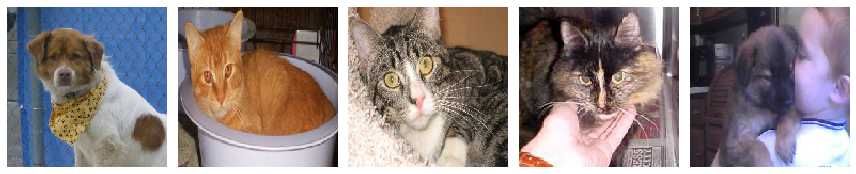

[1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.]


In [0]:
# This 'next' function returns a batch (size=128 in this example) from the dataset
sample_x, sample_y = next(train_gen)
print(sample_x.shape)
print(sample_x.min())
print(sample_x.max())
print(sample_y.shape)

# Show a few of them
fig, axes = plt.subplots(1, 5, figsize=(12, 12))
axes = axes.flatten()
for img, ax in zip(sample_x[:5], axes):
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout()
plt.show()

print(sample_y[:20])

# Part 3: Create CNN model and train it

In [0]:
# == Q1 ==
# Usando la siguiente red, pude conseguir una pérdida de 0.2485 y exactitud de 0.5707.
# Diseña una red que te permita mejorar este desempeño.
# ¿Puedes lograr exactitud >= 0.8?
# ¿Cuál es la pérdida asociada?
# ¿Cuántos parámetros tiene tu modelo?
# ¿Qué otros hiper-parámetros definiste?

In [0]:
# Create a CNN
CNN = Sequential([
    Dropout(0.001, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(64, 7, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 7, activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 5, activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 5, activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(1, activation='sigmoid')
])

CNN.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 64)      9472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 66, 128)       401536    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 256)       819456    


In [0]:
# Compile: Define training parameters
CNN.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [0]:
# Train model
  history = CNN.fit_generator(
      generator=train_gen,
      steps_per_epoch=n _total_train//batch_size,
      epochs=n_epochs,
      validation_data=val_gen,
      validation_steps=n_total_val//batch_size
  )




Epoch 1/15





15/15 [==============================] - 26s 2s/step - loss: 0.2498 - acc: 0.5044 - val_loss: 0.2498 - val_acc: 0.4955
Epoch 2/15
15/15 [==============================] - 10s 649ms/step - loss: 0.2499 - acc: 0.4933 - val_loss: 0.2495 - val_acc: 0.5115
Epoch 3/15
15/15 [==============================] - 9s 611ms/step - loss: 0.2496 - acc: 0.5054 - val_loss: 0.2499 - val_acc: 0.4897
Epoch 4/15
15/15 [==============================] - 9s 600ms/step - loss: 0.2496 - acc: 0.4929 - val_loss: 0.2495 - val_acc: 0.5046
Epoch 5/15
15/15 [==============================] - 9s 609ms/step - loss: 0.2495 - acc: 0.4976 - val_loss: 0.2494 - val_acc: 0.5034
Epoch 6/15
15/15 [==============================] - 8s 552ms/step - loss: 0.2493 - acc: 0.5050 - val_loss: 0.2492 - val_acc: 0.5080
Epoch 7/15
15/15 [==============================] - 9s 567ms/step - loss: 0.2495 - acc: 0.4932 - val_loss: 0.2494 - val_acc: 0.4966
Epoch 8/15
15/15 [==============================] - 8s 525ms/step - l

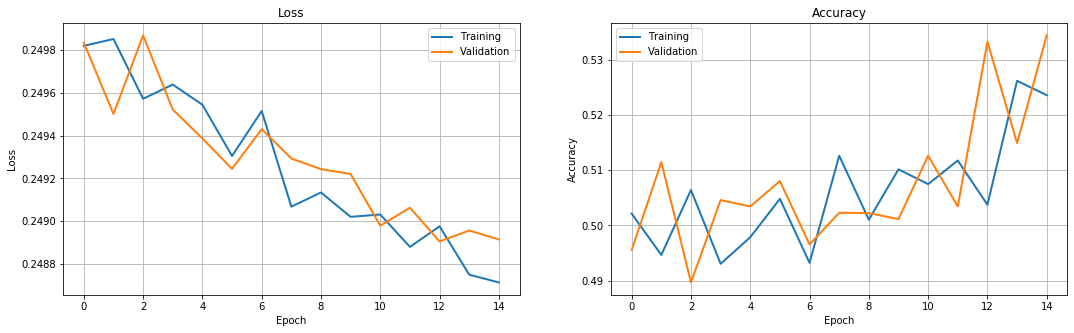

In [0]:
# Plot loss
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='Training', linewidth=2)
plt.plot(history.history['val_acc'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [0]:
CNN4 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
 #   Dropout(0.2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
#  Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.9),
    Dense(1, activation='sigmoid')
])
CNN4.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [0]:
CNN4.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
batch_size=64
n_epochs=25

In [0]:
history = CNN4.fit_generator(
    
    generator=train_gen,
    steps_per_epoch=n_total_train//batch_size,
    epochs=n_epochs,
    validation_data=val_gen,
    validation_steps=n_total_val//batch_size

)

Epoch 1/25
31/31 [==============================] - 17s 536ms/step - loss: 0.2584 - acc: 0.4962 - val_loss: 0.2498 - val_acc: 0.5406
Epoch 2/25
31/31 [==============================] - 16s 525ms/step - loss: 0.2493 - acc: 0.5154 - val_loss: 0.2460 - val_acc: 0.5572
Epoch 3/25
31/31 [==============================] - 16s 523ms/step - loss: 0.2491 - acc: 0.5348 - val_loss: 0.2441 - val_acc: 0.5855
Epoch 4/25
31/31 [==============================] - 16s 513ms/step - loss: 0.2409 - acc: 0.5783 - val_loss: 0.2284 - val_acc: 0.6651
Epoch 5/25
31/31 [==============================] - 16s 503ms/step - loss: 0.2249 - acc: 0.6341 - val_loss: 0.2089 - val_acc: 0.6774
Epoch 6/25
31/31 [==============================] - 16s 504ms/step - loss: 0.2082 - acc: 0.6628 - val_loss: 0.1954 - val_acc: 0.7009
Epoch 7/25
31/31 [==============================] - 16s 504ms/step - loss: 0.1959 - acc: 0.6968 - val_loss: 0.1884 - val_acc: 0.7110
Epoch 8/25
31/31 [==============================] - 15s 488ms/step - 

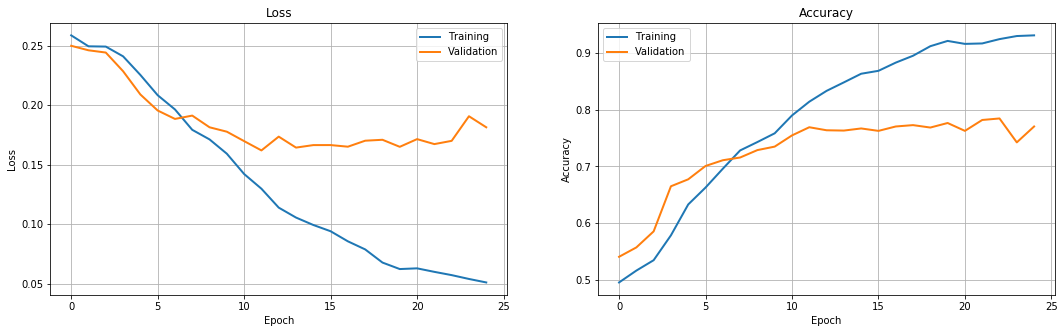

In [0]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='Training', linewidth=2)
plt.plot(history.history['val_acc'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [0]:
batch_size=40
n_epochs=40

In [0]:
history = CNN4.fit_generator(
#con batch size=50, n_ephocs=25, n_dropout=0.9
    generator=train_gen,
    steps_per_epoch=n_total_train//batch_size,
    epochs=n_epochs,
    validation_data=val_gen,
    validation_steps=n_total_val//batch_size

)

Epoch 1/40
50/50 [==============================] - 29s 571ms/step - loss: 0.0441 - acc: 0.9447 - val_loss: 0.1741 - val_acc: 0.7740
Epoch 2/40
50/50 [==============================] - 25s 494ms/step - loss: 0.0400 - acc: 0.9474 - val_loss: 0.1652 - val_acc: 0.7884
Epoch 3/40
50/50 [==============================] - 25s 502ms/step - loss: 0.0367 - acc: 0.9507 - val_loss: 0.1791 - val_acc: 0.7705
Epoch 4/40
50/50 [==============================] - 25s 493ms/step - loss: 0.0325 - acc: 0.9570 - val_loss: 0.1761 - val_acc: 0.7813
Epoch 5/40
50/50 [==============================] - 25s 498ms/step - loss: 0.0315 - acc: 0.9610 - val_loss: 0.1819 - val_acc: 0.7785
Epoch 6/40
50/50 [==============================] - 26s 512ms/step - loss: 0.0279 - acc: 0.9658 - val_loss: 0.1788 - val_acc: 0.7807
Epoch 7/40
50/50 [==============================] - 26s 512ms/step - loss: 0.0260 - acc: 0.9656 - val_loss: 0.1785 - val_acc: 0.7852
Epoch 8/40
50/50 [==============================] - 28s 565ms/step - 

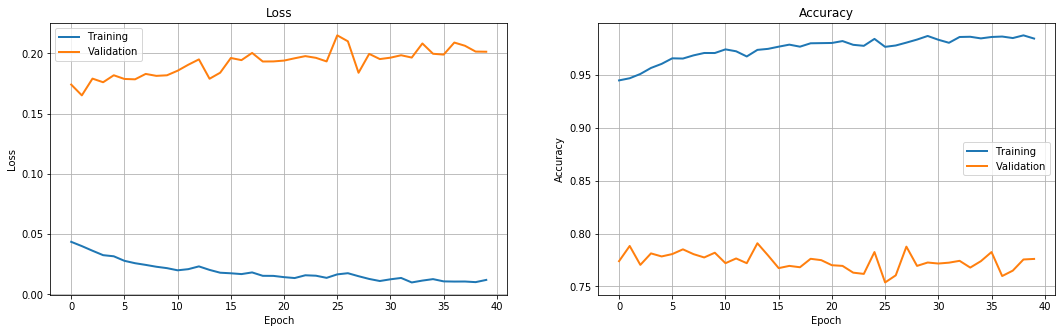

In [0]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='Training', linewidth=2)
plt.plot(history.history['val_acc'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [0]:
history = CNN4.fit_generator(
#con batch size=40, n_ephocs=25, n_dropout=0.9
    generator=train_gen,
    steps_per_epoch=n_total_train//batch_size,
    epochs=n_epochs,
    validation_data=val_gen,
    validation_steps=n_total_val//batch_size

)

Epoch 1/40
50/50 [==============================] - 29s 577ms/step - loss: 0.0103 - acc: 0.9880 - val_loss: 0.2076 - val_acc: 0.7695
Epoch 2/40
50/50 [==============================] - 25s 500ms/step - loss: 0.0109 - acc: 0.9854 - val_loss: 0.2115 - val_acc: 0.7657
Epoch 3/40
50/50 [==============================] - 26s 511ms/step - loss: 0.0110 - acc: 0.9840 - val_loss: 0.2114 - val_acc: 0.7647
Epoch 4/40
50/50 [==============================] - 25s 505ms/step - loss: 0.0096 - acc: 0.9885 - val_loss: 0.2093 - val_acc: 0.7641
Epoch 5/40
50/50 [==============================] - 26s 514ms/step - loss: 0.0124 - acc: 0.9828 - val_loss: 0.2055 - val_acc: 0.7714
Epoch 6/40
50/50 [==============================] - 26s 519ms/step - loss: 0.0092 - acc: 0.9882 - val_loss: 0.2132 - val_acc: 0.7583
Epoch 7/40
50/50 [==============================] - 26s 523ms/step - loss: 0.0084 - acc: 0.9893 - val_loss: 0.2011 - val_acc: 0.7737
Epoch 8/40
50/50 [==============================] - 29s 583ms/step - 

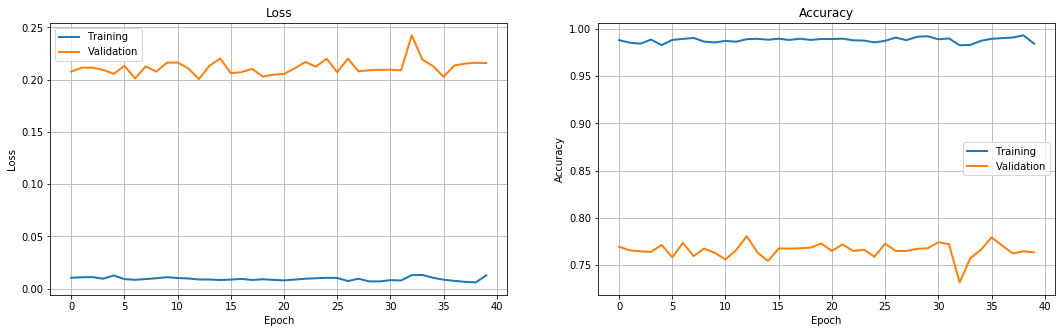

In [0]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='Training', linewidth=2)
plt.plot(history.history['val_acc'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [0]:
history = CNN4.fit_generator(
#con batch size=40, n_ephocs=40, n_dropout=0.9
    generator=train_gen,
    steps_per_epoch=n_total_train//batch_size,
    epochs=n_epochs,
    validation_data=val_gen,
    validation_steps=n_total_val//batch_size

)

Epoch 1/40
50/50 [==============================] - 28s 559ms/step - loss: 0.0078 - acc: 0.9896 - val_loss: 0.2119 - val_acc: 0.7631
Epoch 2/40
50/50 [==============================] - 24s 473ms/step - loss: 0.0066 - acc: 0.9909 - val_loss: 0.2179 - val_acc: 0.7644
Epoch 3/40
50/50 [==============================] - 24s 486ms/step - loss: 0.0065 - acc: 0.9915 - val_loss: 0.2161 - val_acc: 0.7737
Epoch 4/40
50/50 [==============================] - 24s 487ms/step - loss: 0.0069 - acc: 0.9912 - val_loss: 0.2171 - val_acc: 0.7657
Epoch 5/40
50/50 [==============================] - 25s 494ms/step - loss: 0.0079 - acc: 0.9902 - val_loss: 0.2045 - val_acc: 0.7759
Epoch 6/40
50/50 [==============================] - 25s 495ms/step - loss: 0.0065 - acc: 0.9917 - val_loss: 0.2058 - val_acc: 0.7791
Epoch 7/40
50/50 [==============================] - 25s 506ms/step - loss: 0.0068 - acc: 0.9913 - val_loss: 0.2119 - val_acc: 0.7701
Epoch 8/40
50/50 [==============================] - 28s 555ms/step - 

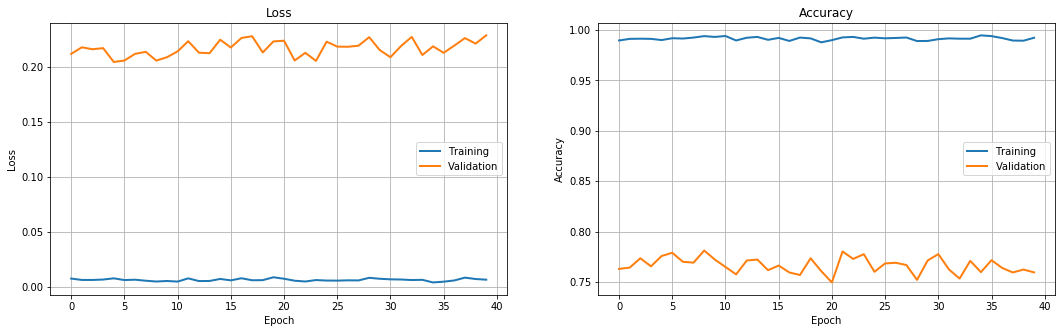

In [0]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='Training', linewidth=2)
plt.plot(history.history['val_acc'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

# Part 4: A new type of CNN

In [0]:
# Importa los dígitos MNIST
# == Q2 ==
# Revisa esta y las tres celdas siguientes, y explica por qué crees que en esta celda,
# al importar las imágenes, las asignamos a una variable llamada "y" (en vez de a x como
# lo hicimos en alguna tarea anterior).
# Por que en lugar de separala estamos vectorizando los valores 
from keras.datasets import mnist
(y_train, _), (y_test, _) = mnist.load_data()
y_train = y_train / 255.
y_test  = y_test  / 255.
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], y_train.shape[2], 1))
y_test  = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], y_test.shape[2], 1))

print("Shapes")
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes
y_train: (60000, 28, 28, 1)
y_test: (10000, 28, 28, 1)


In [0]:
# == Q3 ==
# Aquí defino una función. ¿Puedes explica qué es lo que hace?
# Esta cambiando el tamaño (dimensiones) de una imagen que recibe como 
# entrada y aleatoriamente esta modificando/perturbando puntos de la 
# imagen en su nuevo tamaño.
from skimage.transform import resize
def a_function(IMG):
  img = resize(IMG.copy(), (7, 7))
  for row in range(7):
    for col in range(7):
      thresh = np.random.rand()
      if thresh > 0.9:
        img[row, col] = np.abs(img[row, col] - 1)
  return img

In [0]:
# Ahora sí genero x (señales de entrada)
x_train = np.array([a_function(IMG) for IMG in y_train])
x_test  = np.array([a_function(IMG) for IMG in y_test ])

print("Shapes")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

Shapes
x_train: (60000, 7, 7, 1)
x_test: (10000, 7, 7, 1)


In [0]:
# Create a CNN
CNN = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(32, 3, padding='same', activation='relu'),
    UpSampling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(32, 3, padding='same', activation='relu'),
    UpSampling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(1, 3, padding='same', activation='sigmoid'),
])

CNN.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 7, 7, 32)          320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)   

In [0]:
# Compile: Define training parameters
CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = CNN.fit(x=x_train, y=y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1, shuffle=True)




Train on 54000 samples, validate on 6000 samples
Epoch 1/10





54000/54000 [==============================] - 8s 143us/step - loss: 0.1617 - acc: 0.8037 - val_loss: 0.1154 - val_acc: 0.8087
Epoch 2/10
54000/54000 [==============================] - 5s 93us/step - loss: 0.1083 - acc: 0.8101 - val_loss: 0.1052 - val_acc: 0.8124
Epoch 3/10
54000/54000 [==============================] - 5s 92us/step - loss: 0.1009 - acc: 0.8115 - val_loss: 0.0995 - val_acc: 0.8115
Epoch 4/10
54000/54000 [==============================] - 5s 92us/step - loss: 0.0972 - acc: 0.8120 - val_loss: 0.0964 - val_acc: 0.8127
Epoch 5/10
54000/54000 [==============================] - 5s 90us/step - loss: 0.0946 - acc: 0.8123 - val_loss: 0.0942 - val_acc: 0.8124
Epoch 6/10
54000/54000 [==============================] - 5s 91us/step - loss: 0.0927 - acc: 0.8126 - val_loss: 0.0932 - val_acc: 0.8127
Epoch 7/10
54000/54000 [==============================] - 5s 92us/step - loss: 0.0912 - acc: 0.8128 - val_loss: 0.0911 -

In [0]:
# == Q4 ==
# ¿Qué problema está resolviendo esta red?
# La red está resolviendo un problema de clasificación de 
# números del 0 al 9. Al recibir la imagen de un número como entrada la red 
# predice que número es.


# == Q5 ==
# ¿Puedes mejorar el modelo para aumentar la exactitud a más de 0.95?
# Reporta el modelo resultante.

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, UpSampling2D


In [166]:
CNN = Sequential([
                  
    Conv2D(64, 3, padding='same', activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(64, 3, padding='same', activation='relu'),
    UpSampling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    UpSampling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(1, 3, padding='same', activation='sigmoid'),
])

CNN.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_256 (Conv2D)          (None, 7, 7, 64)          640       
_________________________________________________________________
conv2d_257 (Conv2D)          (None, 7, 7, 64)          36928     
_________________________________________________________________
up_sampling2d_66 (UpSampling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_258 (Conv2D)          (None, 14, 14, 128)       73856     
_________________________________________________________________
up_sampling2d_67 (UpSampling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_259 (Conv2D)          (None, 28, 28, 64)        73792     
_________________________________________________________________
conv2d_260 (Conv2D)          (None, 28, 28, 1)       

In [0]:
# Compile: Define training parameters
CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [178]:
history = CNN.fit(x=x_train, y=y_train, batch_size=15, epochs=10, verbose=1, validation_split=0.1, shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 25s 470us/step - loss: 0.0780 - acc: 0.8144 - val_loss: 0.0789 - val_acc: 0.8147
Epoch 2/10
54000/54000 [==============================] - 26s 483us/step - loss: 0.0775 - acc: 0.8145 - val_loss: 0.0787 - val_acc: 0.8146
Epoch 3/10
54000/54000 [==============================] - 26s 474us/step - loss: 0.0771 - acc: 0.8145 - val_loss: 0.0782 - val_acc: 0.8147
Epoch 4/10
54000/54000 [==============================] - 26s 479us/step - loss: 0.0769 - acc: 0.8146 - val_loss: 0.0779 - val_acc: 0.8147
Epoch 5/10
54000/54000 [==============================] - 26s 486us/step - loss: 0.0766 - acc: 0.8146 - val_loss: 0.0778 - val_acc: 0.8146
Epoch 6/10
54000/54000 [==============================] - 26s 473us/step - loss: 0.0763 - acc: 0.8146 - val_loss: 0.0774 - val_acc: 0.8148
Epoch 7/10
54000/54000 [==============================] - 26s 473us/step - loss: 0.0761 - acc: 0.8147 - val_loss: 0.0

In [179]:
print("x_train:", x_train.shape)

x_train: (60000, 7, 7, 1)


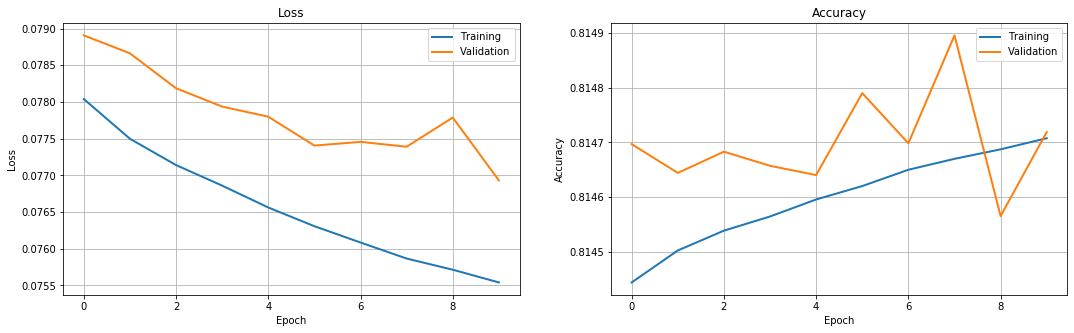

In [180]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='Training', linewidth=2)
plt.plot(history.history['val_acc'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [181]:
history.history['loss'][-1]

0.07554045096867615

In [182]:
history.history['val_loss'][-1]

0.07693064297549426

In [183]:
history.history['acc'][-1]

0.8147076013187567

In [184]:
history.history['val_acc'][-1]

0.8147189611196518

In [185]:
print("Epocas:", 10)
print("Batch size:", 15)
print("Optimizador:", " Adam")
print("Loss function:" " Binary Crossentropy")
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Accuracy", history.history['acc'][-1])
print("Validation Accuracy", history.history['val_acc'][-1])

Epocas: 10
Batch size: 15
Optimizador:  Adam
Loss function: Binary Crossentropy
Training Loss: 0.07554045096867615
Validation Loss: 0.07693064297549426
Accuracy 0.8147076013187567
Validation Accuracy 0.8147189611196518
